<a href="https://colab.research.google.com/github/Msamuelsons/admissao-rede-neural/blob/main/neural_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: [Dataset da kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)

In [7]:
import pandas as pd

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [8]:
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.drop('Serial No.', axis=1, inplace=True)

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
y = data['Chance of Admit ']
x = data.drop('Chance of Admit ', axis=1)

In [27]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [29]:
len(x.columns) #Entrada

7

In [20]:
x.isnull().sum(), y.isnull().sum()

(GRE Score            0
 TOEFL Score          0
 University Rating    0
 SOP                  0
 LOR                  0
 CGPA                 0
 Research             0
 dtype: int64,
 0)

In [24]:
len(sorted(y.value_counts().unique())) # Saída

19

In [25]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
x.shape[0]

500

# Usando Adam

In [43]:
from keras.optimizers import Adam

'''
Observação: quando coloquei 30 neurônios, o modelo ficou sobreajustado. Dando uma queda consideravel de desenplenho
'''
modelo = Sequential()
modelo.add(Dense(10, input_dim=7, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

otimizador = Adam()
modelo.compile(loss='mean_squared_error', optimizer=otimizador, metrics=['mae'])
historico = modelo.fit(X_treino, y_treino, epochs=1000, batch_size=500, validation_data=(X_teste, y_teste), verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 649ms/step - loss: 3.7943 - mae: 1.9397 - val_loss: 3.2758 - val_mae: 1.8008
Epoch 2/1000
1/1 [==============================] - 0s 47ms/step - loss: 3.3077 - mae: 1.8104 - val_loss: 2.8423 - val_mae: 1.6766
Epoch 3/1000
1/1 [==============================] - 0s 62ms/step - loss: 2.8714 - mae: 1.6860 - val_loss: 2.4558 - val_mae: 1.5576
Epoch 4/1000
1/1 [==============================] - 0s 52ms/step - loss: 2.4824 - mae: 1.5669 - val_loss: 2.1170 - val_mae: 1.4453
Epoch 5/1000
1/1 [==============================] - 0s 44ms/step - loss: 2.1429 - mae: 1.4550 - val_loss: 1.8470 - val_mae: 1.3489
Epoch 6/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.8707 - mae: 1.3584 - val_loss: 1.6340 - val_mae: 1.2678
Epoch 7/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6556 - mae: 1.2770 - val_loss: 1.4530 - val_mae: 1.1947
Epoch 8/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.4727 - 

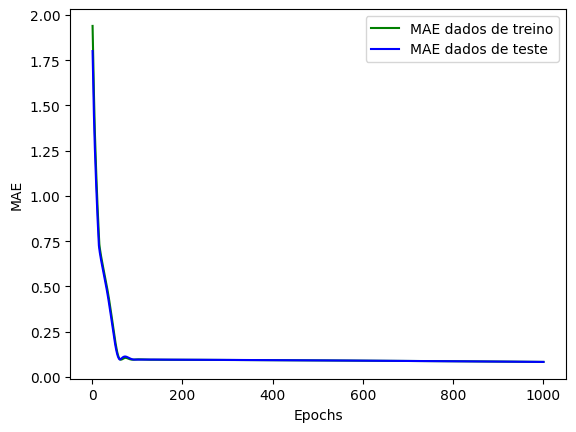

In [44]:
import matplotlib.pyplot as plt


mae_treino = historico.history['mae']
mae_teste = historico.history['val_mae']

epochs = range(1, len(mae_treino) + 1)
plt.plot(epochs, mae_treino, '-g', label='MAE dados de treino')
plt.plot(epochs, mae_teste, '-b', label='MAE dados de teste')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Utilizando RMSprop

In [46]:
from keras.optimizers import RMSprop
otimizador_rmsprop = RMSprop()
modelo.compile(loss='mean_squared_error', optimizer=otimizador, metrics=['mae'])
historico_rmsprop = modelo.fit(X_treino, y_treino, epochs=1000, batch_size=500,validation_data=(X_teste, y_teste), verbose=1 )

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0109 - mae: 0.0829 - val_loss: 0.0116 - val_mae: 0.0829
Epoch 2/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.0109 - mae: 0.0829 - val_loss: 0.0116 - val_mae: 0.0828
Epoch 3/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0109 - mae: 0.0829 - val_loss: 0.0116 - val_mae: 0.0828
Epoch 4/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0109 - mae: 0.0829 - val_loss: 0.0116 - val_mae: 0.0828
Epoch 5/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0116 - val_mae: 0.0828
Epoch 6/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0116 - val_mae: 0.0828
Epoch 7/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0116 - val_mae: 0.0827
Epoch 8/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.0109 - mae

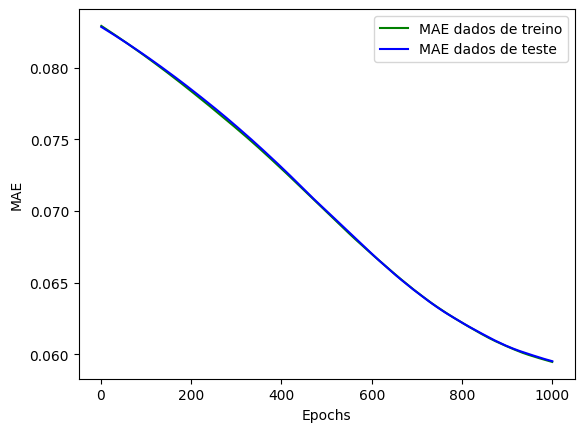

In [47]:
import matplotlib.pyplot as plt



mae_treino = historico_rmsprop.history['mae']
mae_teste = historico_rmsprop.history['val_mae']

epochs = range(1, len(mae_treino) + 1)
plt.plot(epochs, mae_treino, '-g', label='MAE dados de treino')
plt.plot(epochs, mae_teste, '-b', label='MAE dados de teste')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Erro médio absoluto

In [45]:
score = modelo.evaluate(X_teste, y_teste, verbose=1)
print('Acurácia (MAE) no conjunto de teste:', score[1])
# Adam

5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0829
Acurácia (MAE) no conjunto de teste: 0.08287882804870605


In [48]:
score = modelo.evaluate(X_teste, y_teste, verbose=1)
print('Acurácia (MAE) no conjunto de teste:', score[1])
# RMS

5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0595
Acurácia (MAE) no conjunto de teste: 0.05951792374253273
